In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("houses1000.csv")

In [24]:
# data.to_parquet("houses1000.parquet")

In [25]:
needed_columns = ['timestamp', 'maid', 'hh_id','iiqid', 'partner_id', 'ip', 'iscellip',
       'cellispid', 'domain','is_house_ip_or_source_ip', 'brand', 'model', 'os', 'osversion',
       'browser', 'advertisedbrowser', 'browserversion', 'type', 'is_best_ip']
unnecessary_columns = [c for c in data.columns if c not in needed_columns]

In [26]:
unnecessary_columns

['filename',
 'profile_house',
 'first_cookie',
 'a',
 'b',
 'c',
 'uahash',
 'gpslat',
 'gpslon',
 'd',
 'e',
 'f',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'is_unreachable_first_cookie',
 'is_original_ip',
 'real_maid',
 'battery_level',
 'height',
 'width',
 'free_disk_space',
 'total_disk_space',
 'hardware',
 'publisher',
 'flavor']

In [27]:
data.drop(unnecessary_columns, axis=1, inplace=True)

In [28]:
data.head()

,timestamp,iiqid,hh_id,maid,partner_id,ip,iscellip,cellispid,domain,is_house_ip_or_source_ip,brand,model,os,osversion,browser,advertisedbrowser,browserversion,type,is_best_ip
0,1672916867869,EUuUmjWsqL,000eT0aAVu,4,14,26343170,False,483294422,-1478686014,False,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
1,1672916867864,EUuUmjWsqL,000eT0aAVu,3,14,26343170,False,483294422,-1478686014,False,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
2,1671513889036,EUuUmjWsqL,000eT0aAVu,4,14,2092771755,False,483294422,326157497,True,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
3,1671513205899,EUuUmjWsqL,000eT0aAVu,4,14,2092771755,False,483294422,-1699376052,True,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
4,1671513205881,EUuUmjWsqL,000eT0aAVu,3,14,2092771755,False,483294422,-1699376052,True,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721513 entries, 0 to 721512
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   timestamp                 721513 non-null  int64 
 1   iiqid                     638472 non-null  object
 2   hh_id                     721513 non-null  object
 3   maid                      721513 non-null  int64 
 4   partner_id                721513 non-null  int64 
 5   ip                        721513 non-null  int64 
 6   iscellip                  721513 non-null  bool  
 7   cellispid                 721513 non-null  int64 
 8   domain                    721513 non-null  int64 
 9   is_house_ip_or_source_ip  721513 non-null  bool  
 10  brand                     721157 non-null  object
 11  model                     718081 non-null  object
 12  os                        721142 non-null  object
 13  osversion                 720664 non-null  object
 14  brow

In [30]:
third_parties = data[(data['maid'] == 4) | (data['maid'] == 7)]

In [35]:
third_parties['hh_id'].nunique()

990

In [49]:
random_hh_id = np.random.choice(third_parties.loc[third_parties['is_house_ip_or_source_ip']==True,'hh_id'])
random_h = third_parties[third_parties['hh_id']==random_hh_id]

<Axes: xlabel='os', ylabel='count'>

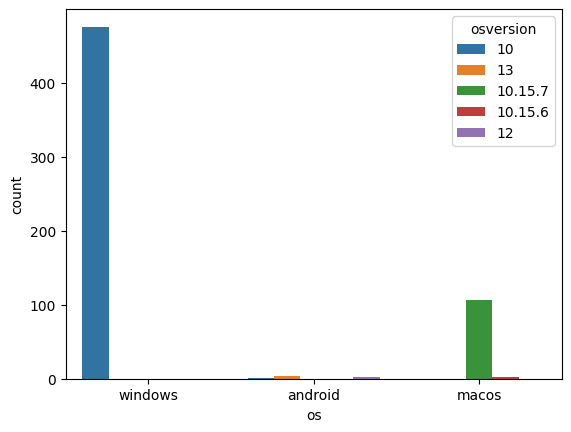

In [50]:
sns.countplot(data=random_h, x='os', hue='osversion')

<Axes: xlabel='timestamp', ylabel='browserversion'>

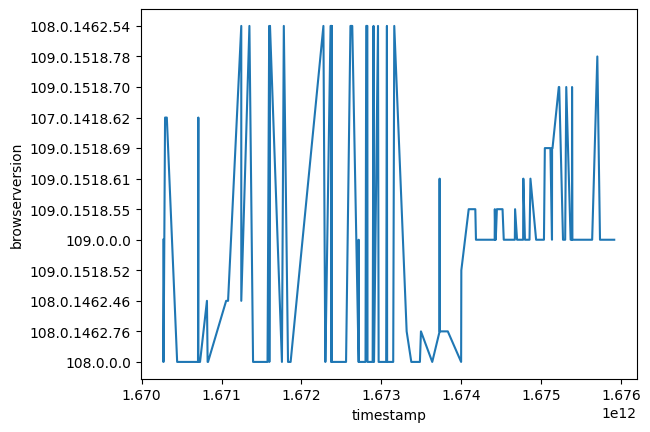

In [51]:
sns.lineplot(data=random_h[random_h['os']=='windows'], x='timestamp', y='browserversion')